# Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and see data

In [ ]:
# see the number of messages
messages = [line.rstrip() for line in open('./data/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
# see first 10 messages
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [4]:
# function to load the data
def load_data(filepath):
    return pd.read_csv(filepath, sep='\t', quoting=csv.QUOTE_NONE,names = ['label', 'message'])

In [5]:
# load the sms data
messages = load_data('data/SMSSpamCollection')

In [6]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
# check for missing values
messages.isna().mean()

label      0.0
message    0.0
dtype: float64

## Check data imbalance

In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

<Axes: xlabel='label'>

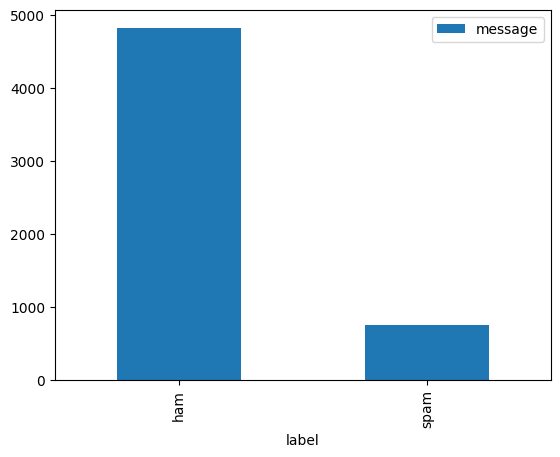

In [9]:
messages.groupby('label').count().plot(kind='bar')

In [10]:
messages['length'] = messages['message'].map(lambda text: len(text))
messages.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


<Axes: ylabel='Frequency'>

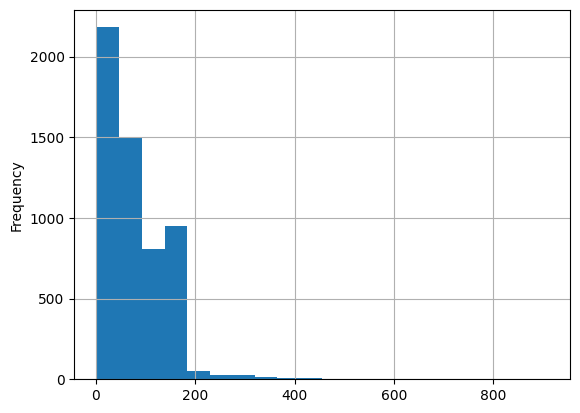

In [11]:
messages.length.plot(bins=20, kind='hist',grid=True)

In [12]:
messages.length.describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

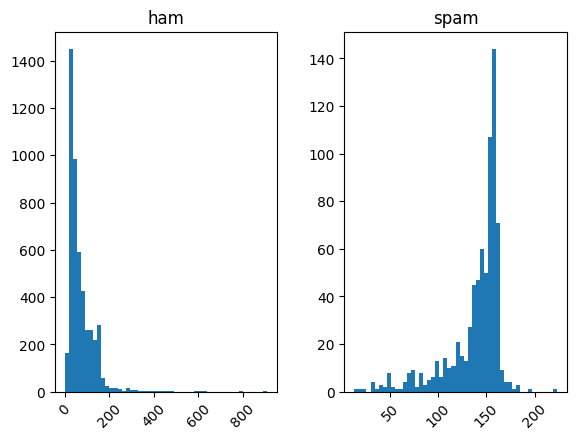

In [13]:
messages.hist(column='length', by='label', bins=50, xrot=45)

# Data Preprocessing

In [14]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/utpalraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/utpalraj/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/utpalraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/utpalraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# function for preprocessing messages
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Removing special characters and punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Removing numbers
    tokens = [token for token in tokens if not token.isdigit()]
    
    # Removing URLs
    tokens = [token for token in tokens if not token.startswith('http')]
    
    # Removing HTML tags
    tokens = [token for token in tokens if not token.startswith('<')]
    
    # Converting all text to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Removing empty strings
    tokens = [token for token in tokens if token != '']
    
    return tokens

In [16]:
messages['message'] = messages['message'].apply(preprocess_text)

In [17]:
messages.head(10)

,label,message,length
0,ham,"[go, jurong, point, crazy, available, bugis, n...",111
1,ham,"[ok, lar, joking, wif, u, oni]",29
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,...",155
3,ham,"[u, dun, say, early, hor, u, c, already, say]",49
4,ham,"[nah, i, think, go, usf, life, around, though]",61
5,spam,"[freemsg, hey, darling, week, word, back, i, l...",147
6,ham,"[even, brother, like, speak, they, treat, like...",77
7,ham,"[as, per, request, melle, oru, minnaminunginte...",160
8,spam,"[winner, as, valued, network, customer, select...",157
9,spam,"[had, mobile, month, u, r, entitled, update, l...",154


# Splitting into Train and Test data

In [18]:
def split_data(df, seed = 42, size = 0.2):
    train_df, test_df = train_test_split(df, test_size=size, random_state = seed)
    return train_df, test_df

In [19]:
# Split the data into training, validation, and testing sets
train_df, test_df = split_data(messages)

In [20]:
len(train_df), len(test_df), len(train_df) + len(test_df)

(4459, 1115, 5574)

In [21]:
train_df.head(10)

,label,message,length
1350,spam,"[sexy, st, george, day, pic, jordan, txt, pic,...",154
5544,ham,"[armand, say, get, as, epsilon]",40
1168,ham,"[lol, i, hot, air, balloon]",39
5551,ham,"[you, know, wot, people, wear, t, shirt, jumpe...",87
5320,ham,"[good, morning, love, i, go, sleep, wish, grea...",159
1741,spam,"[ur, going, bahamas, callfreefone, speak, live...",158
4323,ham,"[sorry, i, able, get, see, morning]",61
1485,ham,"[sorry, i, call, later]",22
1879,ham,"[i, am, at, a, party, with, alex, nichols]",33
1344,ham,"[crazy, ar, married, ü, like, gd, looking, guy...",159


In [22]:
test_df.head(10)

,label,message,length
3690,ham,"[you, still, coming, tonight]",25
3527,ham,"[hey, babe, far, spk, at, da, mo, dead, da, wr...",161
724,ham,"[ya, even, cooky, jelly]",40
3370,ham,"[sorry, gone, place, tomorrow, really, sorry]",69
468,ham,"[when, going, ride, bike]",37
5412,ham,"[daddy, shu, shu, looking, u, u, wan, tell, u,...",82
4362,ham,"[do, think, about, what, u, have, got, think, ...",90
4241,ham,"[the, lay, man, just, let, know, missed, thoug...",155
5442,ham,"[thank, generally, date, brothas]",45
5309,ham,"[what, leave]",23


# Saving Train and Test Data as csv files

In [23]:
# function to store as a csv file
def store_as_csv(df, name):
    return df.to_csv(name, index=False)

In [24]:
# Save the training, validation, and testing sets to CSV files
store_as_csv(train_df, name = 'train.csv')
store_as_csv(test_df, name = 'test.csv')